# Cours d'analyse de données 
GM3

Pour compléter ce TD vous avez le choix entre plusieurs options:
- Si vous avez une installation locale d'un compilateur de langage Python i.e (Anaconda, Vscode), télechargez le notebook en cliquant sur "download" et modifiez/compilez le fichier localement. 
- Si vous n'avez pas d'installation locale, faite une copie de ce ficher dans le binder, avec vos initiales, et modifiez/compilez votre fichier en ligne.
 

## TD 1 
23/03/2023
### Part I: Python rappels 

Exercice 1. Créer un programme simule un jeux de fléchettes. Le programme affiche la cible et les flechettes qui ont été lancées. Le programme compte aussi le nombre de points en fonction de la position de la flechette par rapport à la cible.

**Etape 1**: Ecris une function qui permet de demander à l'utilisateur combien il possède de flechettes. Teste la fonction et affiche la réponse à l'écran. 


In [2]:
# Function to ask the user how many dart is he throwing
def prompt_user():
    print("Combien y-a-t'il de flechettes?")  # Print question 
    return input() # Save the number of player as an input from the user

n_flechettes = prompt_user() # Call the function and save the output in the n_flechettes variable
print("Il y a ",n_flechettes, "flechettes") # Print a sentence displying the number of darts


Combien y-a-t'il de flechettes?
Il y a  50 flechettes


**Etape 2**: Ecris une fonction qui permet de définir la cible. On considère que la cible est un cercle de centre (xo, yo) et de rayon r.

Teste cette fonction.

> **Hint**:  Utlise le package [numpy](https://numpy.org/doc/stable/user/absolute_beginners.html)

>**Hint**: Souviens toi du cours de Maths B ;)

In [3]:
# Import necessary packages
import numpy as np

# Variable definition 
xo = 1 # (m) Circle centre x coordinate
yo = 1.5 # (m) Circle centre y coordinate
r = 0.2 # (m) Circle radius

C = [xo,yo,r] # Save the circle characteristics in a list 

# Method 1)
# Function that makes a circle using trigonometry
# Inputs: C, a list containing the circle centre coordinates xo,yo and the radius of the circle
# Outputs: xx,yy the outter circle coordinates
def cible_trigo(C): 
    t = np.arange(0,2*np.pi,np.pi/100) # step from 0 to 2*pi to do the full circle
    xx = C[2] * np.cos(t) + C[0] # fonction en x
    yy = C[2] * np.sin(t) + C[1] # fonction en y 
    return(xx,yy)

# Method 2)
# Function that makes a circle using the circle equation
# Inputs: C, a list containing the circle centre coordinates xo,yo and the radius of the circle
# Outputs: x,y the outter circle coordinates
def cible(C): 
    x = np.arange(-C[2]+ C[0], C[2]+C[0] , 1/1000) # step, input x
    y = np.sqrt(C[2]**2 -(x -C[0])**2)+ C[1]  # fonction en y 
    return(x,y)


xx,yy = cible_trigo(C) # Call the function cible_trigo from method 1)
x,y = cible(C) # Call the function cible from method 2)

**Etape 3**: Ecris une fonction qui permet d'afficher la cible. En d'autres termes, écris une fonction qui appelle la fonction de l'étape 2 et plot le cercle.
>**Hint**: Utilise le package [Matplotlib](https://matplotlib.org/stable/users/index)

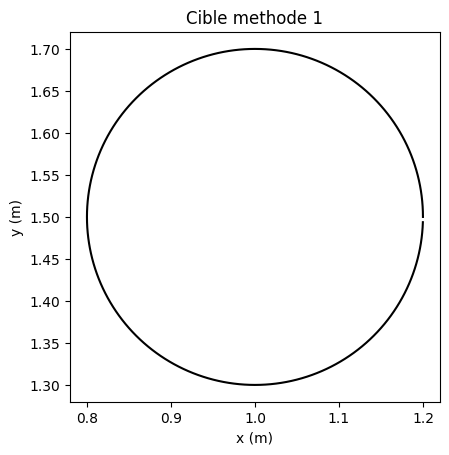

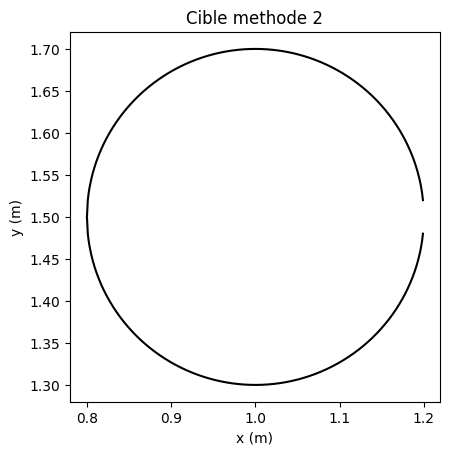

In [6]:
# Import necessary packages
from matplotlib import pyplot as plt

# Method 1) 
# Function that shows a circle calling the trigo function 
# Inputs: C, a list containing the circle centre coordinates xo,yo and the radius of the circle
def plot_cible_trigo(C):
    xx, yy = cible_trigo(C) # call the function cible
    fig, ax = plt.subplots() # plot using subplot to control the aspect ratio
    ax.plot(xx, yy, c = "black") # plot the circle
    #set aspect ratio to 1
    ratio = 1.0
    x_left, x_right = ax.get_xlim() # get axis limits
    y_low, y_high = ax.get_ylim()
    ax.set_aspect(abs((x_right-x_left)/(y_low-y_high))*ratio) # set aspect ratio by modifying the display coordinate system
    plt.title('Cible methode 1')
    plt.xlabel('x (m)')
    plt.ylabel('y (m)')
    

plot_cible_trigo(C)  # Call the function plot_cible_trigo
plt.show()

# Method 2) 
# Function that shows a circle calling the trigo function 
# Inputs: C, a list containing the circle centre coordinates xo,yo and the radius of the circle
def plot_cible(C):
    x,y = cible(C) # call the function cible
    fig, ax = plt.subplots() # plot iusing subplot to control the aspect ratio
    ax.plot(x,y, c = "black") # plot the circle upper half
    ax.plot(x,-y+2*C[1], c = "black") # plot the circle lower half

    #set aspect ratio to 1
    ratio = 1.0
    x_left, x_right = ax.get_xlim() # get axis limits
    y_low, y_high = ax.get_ylim()
    ax.set_aspect(abs((x_right-x_left)/(y_low-y_high))*ratio) # set aspect ratio by modifying the display coordinate system
    plt.title('Cible methode 2')
    plt.xlabel('x (m)')
    plt.ylabel('y (m)')
    


plot_cible(C) # Call the function plot_cible
plt.show()

**Etape 4:** Ecris une fonction qui prend en entrée les coordonnées d'une flechette, ainsi que les parametres de la cible et qui perfome les actions suivantes:
1) Compte les points, i.e +1 si la flechette est à l'interieur de la cible, sinon le score reste le meme.
2) Retourne une liste qui contient les coordonnées de la flechette ainsi que la couleur verte si la flechette est dans la cible, ou la couleur noire si la flechette est en dehors de la cible. 

Teste ta fonction pour un lancé de flechette. 

In [7]:
# Initialise variables
pts = 0 # Number of points 
f_in = np.array([1,1.5]) # Array containing the x,y coordinates of the darts
f_out = [] # List containing the coordinates of the darts, along with a colour depending on whether it is in or outside the circle

# Function that counts the points and assign a color to the dart 
# Inputs: 
# f_in: Vector containing the x,y coordinates of the darts
# C: List containing the circle centre coordinates xo,yo and the radius of the circle
# f_out: Array containing the x,y coordinates of the darts and the associated color
# pts: Number of points 
# Outputs: 
# f_out: Updated array containing the x,y coordinates of the darts and the associated color
# pts: Updated number of points 

def compteur_de_points(f_in,C,pts,f_out):
    if (C[0]-f_in[0])**2 + (C[1]-f_in[1])**2 < C[2]**2 : # If the dart is within the target
        pts +=1 # Add 1 point to the counter 
        f_out.append((f_in[0], f_in[1], "green")) # Fill up the list with the dart coordinates along with the color green
    else:
        f_out.append((f_in[0], f_in[1], "black")) # Else, no points and fill up the list with the dart coordinates along with the color black
    return f_out, pts

f_out, pts = compteur_de_points(f_in,C,pts,f_out) # Call function compteur_de_points
print(f_out)
print(pts)

[(1.0, 1.5, 'green')]
1


**Etape 5**: On considere que le joueur a autant de chance de lancer sa flechette n'importe ou, dans un carré de 0.5m de coté autour du centre de la cible. 
Ecris une fonction qui prend en entré le nombre de flechettes, et simule des lancés random. La fonction appelle ensuite la fonction écrite a l'étape 4 pour compter les points. 
>**Hint**: Utilise le package [random](https://docs.python.org/3/library/random.html)

>**Hint**: Appelle la fonction compteur écrite à l'étape 4 à l'interieur de ta fonction


In [10]:
# Import necessary packages
import random

# Define variables
d = 0.5 # Distance max from the centre of the target where the dart could land
perimeter = np.array([C[0]-d ,C[0]+d ,C[1]-d  ,C[1]+d]) # Define the random perimeter inside which the dart could land
f_out = [] # List containing the coordinates of the darts, along with a colour depending on whether it is in or outside the circle


# Function that allocate a random coordinate to each darts and counts the points
# Inputs: 
# n_flechettes: number of darts to be thrown
# C: List containing the circle centre coordinates xo,yo and the radius of the circle
# perimeter:  random perimeter inside which the dart could land
# Outputs: 
# f_out: Updated array containing the x,y coordinates of the darts and the associated color
# pts: Updated number of points 
def lance_flechette(n_flechettes,C, perimeter):
    for _ in range(n_flechettes):  # For each dart 
        f_in[0],f_in[1] = random.uniform(perimeter[0],perimeter[1]), random.uniform(perimeter[2],perimeter[3]) # Compute where the dart lands
        compteur_de_points(f_in,C,pts,f_out) # Call the function compteur_de_points
    return f_out, pts

lance_flechette(int(n_flechettes),C, perimeter)
print(f_out)
print(pts)


[(0.5353501506472239, 1.6410880337059683, 'black'), (1.4236662060421905, 1.401779680042806, 'black'), (0.9052382107968003, 1.2033931955753951, 'black'), (0.869185023303494, 1.4126462524757513, 'green'), (1.4939505301716103, 1.6553666952741115, 'black'), (0.9890746216746957, 1.7288782706201853, 'black'), (0.6347753147713369, 1.497592397452579, 'black'), (0.7397485737392917, 1.2587061567123554, 'black'), (1.101011202284312, 1.8181359245826763, 'black'), (0.6210216265294317, 1.0608831453715761, 'black'), (0.8167449243967512, 1.8554369025614983, 'black'), (0.8459862598632545, 1.4820550887527224, 'green'), (1.0729218202051156, 1.4120843960879754, 'green'), (0.9566721416253142, 1.2110916863335128, 'black'), (1.247847435602997, 1.7845606199362025, 'black'), (1.4895264425375314, 1.5320409754880902, 'black'), (0.7470649559851481, 1.6946199454499142, 'black'), (0.872724336732326, 1.1601036691115154, 'black'), (0.7741647911182431, 1.0020086295084427, 'black'), (0.8352272434293501, 1.8860815105279

**Etape 6** Afficher les lancés de flechette dans un graph contenant, la cible, les lancés réussis en vert et les lancés ratés en noir

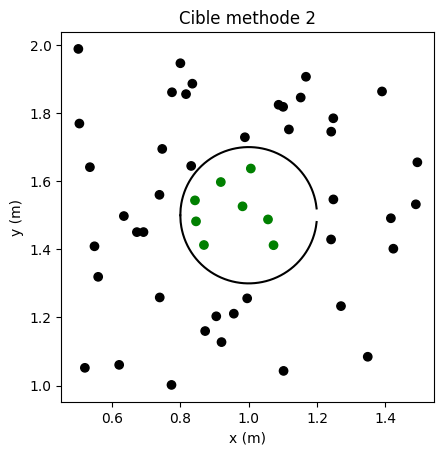

In [11]:
def create_plot(pts):
    x, y, colors = zip(*f_out)
    plot_cible(C)
    plt.scatter(x, y, c=colors)
    plt.show()



create_plot(pts)




## Part II: Etudier les données d'un anémometre à ultrason 

L'anemometre à ultrason enregistre les variables U, V, W en m/s à une fréquence de 32Hz. Des données ont été mesurées en face du WindShaper, étudie ces données.

(Pour info, la datasheet de l'anemometre peut etre téléchargée [ici](https://gillinstruments.com/wp-content/uploads/2022/08/WindMaster-Pro-iss-8.pdf))

**Etape 1**: Importe les donnée du fichier "anemometer_data_TD1.csv" et affiche (print) les données.

>**HINT**: Utilise le package [pandas](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.to_csv.html) 



In [12]:
# Import mecessary packages
import pandas as pd

df = pd.read_csv("anemometer_data_TD1.csv") # Read .csv into a dataframe
print(df) # Affiche la dataframe

        time (s)     U     V     W
0        0.00000 -6.93  4.50  0.28
1        0.03125 -6.91  4.97  0.75
2        0.06250 -7.58  4.88  0.08
3        0.09375 -7.46  4.47  0.56
4        0.12500 -7.77  4.64 -0.05
...          ...   ...   ...   ...
14372  449.12500 -0.08  0.21 -0.17
14373  449.15625 -0.09  0.21 -0.18
14374  449.18750 -0.05  0.19 -0.19
14375  449.21875   NaN   NaN   NaN
14376  449.25000   NaN   NaN   NaN

[14377 rows x 4 columns]


**1.** Créer un graphique qui affiche les variables U, V, W en fonction du temps. 

(N'oublie pas de nommer les axes, donner un titre, afficher la légende 

>**Hint**: Utilise le package [Matplotlib](https://matplotlib.org/stable/users/index)


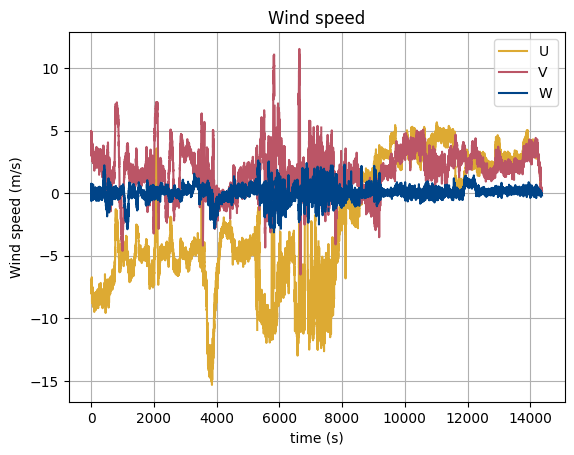

In [13]:
# Import mecessary packages
from matplotlib import pyplot as plt

plt.plot(df.U, c = '#DDAA33') # plot the u component 
plt.plot(df.V, c = '#BB5566') # plot the v component 
plt.plot(df.W, c = '#004488') # plot the w component 
# some color schemes can be found online, i.e here: https://personal.sron.nl/~pault/ 

plt.title('Wind speed') # add title 
plt.xlabel('time (s)') # add label in x
plt.ylabel('Wind speed (m/s)') # add label in y 
plt.legend(['U','V','W']) # add legend 
plt.grid() # turn grid on 
plt.show() # display plot


**2.** Affiche à l'écran les données suivantes: 

**a.** Les moyennes en U, V et W. 

**b.** L'écart type en U, V et W. 

**c.** Le taux de turbulence.

In [15]:
# Method 1)
Mean_all = df.mean(axis = 0) # Calculate all the means by column
print(Mean_all)

# Method 2) 
Umean = df['U'].mean() # Calculate the means of a selected column
Vmean = df.loc[:, 'V'].mean() # If you want only a selected part of the column, add numbers around the : 
Wmean = df['W'].mean()
print('Umean = ' , "{:.3f}".format(Umean), '(m/s)') # Print Umean with only 3 decimals
print('Vmean = ' , "{:.3f}".format(Vmean), '(m/s)')
print('Wmean = ' , "{:.3f}".format(Wmean), '(m/s)')

time (s)    224.625000
U            -2.222449
V             1.917860
W             0.030220
dtype: float64
Umean =  -2.222 (m/s)
Vmean =  1.918 (m/s)
Wmean =  0.030 (m/s)


In [16]:
Std_all = df.std(axis = 0) # Calculate all the standard deviations by columns
print(Std_all)

time (s)    129.700836
U             4.895567
V             1.761467
W             0.575764
dtype: float64


In [22]:
T = np.sqrt(((Std_all[1]**2+Std_all[2]**2+Std_all[3]**2)/3)/(Umean**2+Vmean**2+Wmean**2))*100  # Calculate Turbulence Intensity
print("Taux de turbulence =", "{:.3f}".format(T), '%')

Taux de turbulence = 102.946 %
